# Data Analytics Fundamentals Project 7 - Time Series and Simple Linear Regression

## Eric Meyer

### 2/25/2023
### --------------------------------------------------------------------------------------------------------------------------------------------------

### (1) Celsius vs Fahrenheit - Linear Relationship Example

#### Import library

In [48]:
import pandas as pd

#### Creating data to analyze the Celsius and Fahrenheit temperature relationship

In [49]:
c = lambda f: 5 / 9 *(f - 32)

In [50]:
# generating Fahrenheit temps 0 through 100 in increments of 10, while also pairing the Celsius version of the temperature with it
temps = [(f, c(f)) for f in range(0, 101,10)]

#### Creating DataFrame of the generated celsius and fahrenheit temperatures

In [51]:
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

#### Formatting and plotting the linear relationship between the Fahrenheit and Celsius temperatures

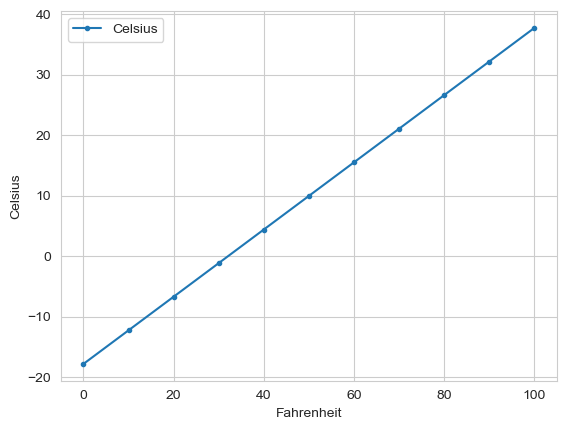

In [52]:
axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

### (2) New York City January Temperatures - Linear Regression & Analysis

#### Loading temperature dataset into a DataFrame

In [53]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

#### Viewing first and last 5 rows of the dataset

In [54]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [55]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


#### Cleaning the data

In [56]:
# renaming the columns
nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [57]:
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [58]:
# checking the data type of the Date column
nyc.Date.dtype

dtype('int64')

In [59]:
# removes last 2 digits of Date column in order to transform column into clean year format
nyc.Date = nyc.Date.floordiv(100)

In [60]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


#### Calculating basic descriptive statistics of the dataset

In [61]:
pd.set_option('display.precision', 2)

In [62]:
nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

#### Forecasting future January temperatures with linear regression

In [63]:
# importing SciPy statistics module
from scipy import stats

In [64]:
# calculating slope and intercept of January temperature data with linregress()
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [65]:
# getting the calculated slope
linear_regression.slope

0.014771361132966163

In [66]:
# getting the calculated intercept
linear_regression.intercept

8.694993233674289

In [67]:
# predicting the average temperature in January of 2019
linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [68]:
# predicting the average temperature in January of 1890
linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [69]:
# predicting the average temperature in January of 2026
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

#### Plotting the average high January temperatures and regression line in Seaborn

In [70]:
import seaborn as sns

In [71]:
sns.set_style('whitegrid')

(10.0, 70.0)

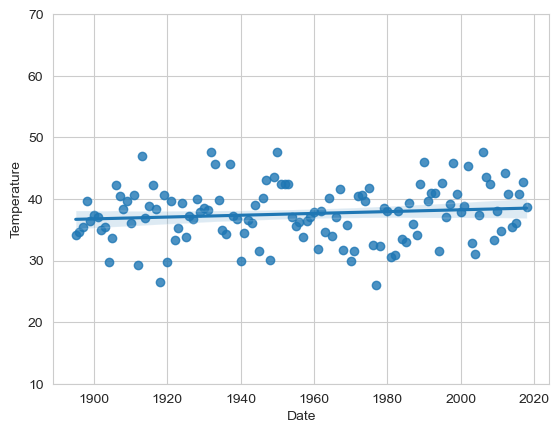

In [72]:
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

### (3) Linear Regression with Skit-Learn

#### Splitting the data into a training set and a testing set

In [73]:
# importing train test split from skit-learn library
from sklearn.model_selection import train_test_split

In [74]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state = 11)

In [75]:
# checking that 75% of data is in train set
X_train.shape

(93, 1)

In [76]:
# checking that 25% of data is in the test set
X_test.shape

(31, 1)

#### Training the model

In [77]:
# importing linear regression from skit-learn library
from sklearn.linear_model import LinearRegression

In [78]:
# creating linear regression estimator
linear_regression_sk = LinearRegression()

In [79]:
# returning the estimator with fit
linear_regression_sk.fit(X = X_train, y = y_train)

LinearRegression()

In [80]:
# getting the slope
linear_regression_sk.coef_

array([0.01939167])

In [81]:
# getting the intercept
linear_regression_sk.intercept_

-0.30779820252656265

#### Testing the model

In [82]:
# testing the model using X_test data
predicted = linear_regression_sk.predict(X_test)

In [83]:
# using y_test data as expected
expected = y_test

In [84]:
# displaying the predicted and expected  values for every 5th element
for p, e in zip(predicted[::5], expected[::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


#### Predicting future temperatures and estimating past temperatures

In [85]:
predict = (lambda x: linear_regression_sk.coef_ * x + linear_regression_sk.intercept_)

In [86]:
# predicting the average temperature in January of 2019
predict(2019)

array([38.84399018])

In [87]:
# estimating the average temperature in January of 1890
predict(1890)

array([36.34246432])

#### Visualizing temperature and date data with regression line

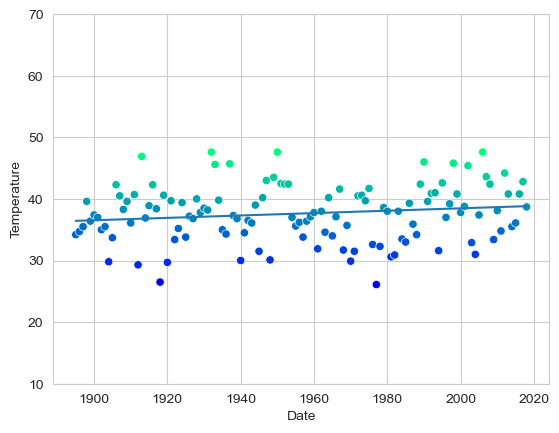

In [88]:
# creating scatter plot with seaborn
axes_sk = sns.scatterplot(data = nyc, x = 'Date', y = 'Temperature', hue = 'Temperature', palette = 'winter', legend = False)

# editing axe numerical scales
axes_sk.set_ylim(10, 70)

import numpy as np

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

y = predict(x)

import matplotlib.pyplot as plt

# adding regression line
line = plt.plot(x, y)

### Conclusions - Two Linear Regression Methods

These methods both have their purposes. I list a few thoughts below:

1) SkiPy -
    - This library is more of a scientific computing tool. The process of linear regression does seem more straight forward without creating a model or training a model. If you are strictly looking for the linear regression on a standard set of data, this may be the route to go. 
2) Skit-Learn -
    - This library is a true machine learning tool within Python. You are able to create a model and train the model with a vast set of data. I see this working well with diverse and unkown data. Once the model is trained and tested, the predict() phase is much more efficient than SciPy.

